In [15]:
from packaging import version

from io import StringIO
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import numpy as np

In [11]:
experiment_id = "q8Dv9M9fQ6CXeIpxJFoBZA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()

CommunicationError: Failed to connect to backend: HTTPSConnectionPool(host='tensorboard.dev', port=443): Max retries exceeded with url: /api/uploader (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc609814c40>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [12]:
%config InlineBackend.figure_formats = ['svg']

mpl.style.use('ggplot')


plt.rcParams.update({
    "font.family": "STIXGeneral",
    "font.sans-serif": "Helvetica",
    "mathtext.fontset": "stix",
})

In [11]:
base_experiment = "Nov18_16-09-24_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0"


modes = [{
    "tag": "online/all",
    "title": "Online",
}, {
    "tag": "offline/all",
    "title": "Offline",
}, {
    "tag": "best-so-far/all",
    "title": "Best-so-far",
}]

experiments = {
    "1": [
        {
            "run": base_experiment,
            "label": "Caso 1",
        },
        {
            "run": "Nov18_17-47-32_PC_mode_single__w_0.5__0.5__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0",
            "label": "Caso 2",
        },
        {
            "run": "Nov18_19-36-12_PC_mode_single__w_0.3__0.7__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0",
            "label": "Caso 3",
        },                
    ],
    "2a": [
        {
            "run": base_experiment,
            "label": "Caso 1",
        },
        {
            "run": "Nov21_06-31-29_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.5_muta_0.5_migr_0.1_metro_0",
            "label": "Caso 2",
        },
        {
            "run": "Nov21_10-00-18_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.3_muta_0.7_migr_0.1_metro_0",
            "label": "Caso 3"
        },
    ],
    "2b": [
        {
            "run": base_experiment,
            "label": "Caso 1",
        },
        {
            "run": "Nov23_06-03-46_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.5_metro_0",
            "label": "Caso 2",
        },
        {
            "run": "Nov23_09-34-34_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.9_metro_0",
            "label": "Caso 3"
        },
    ],
    "3": [
        {
            "run": "Nov26_12-20-12_PC_mode_multi__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0.5",
            "label": "Caso 1",
        },
        {
            "run": "Nov28_14-26-36_PC_mode_single__w_0.7__0.3__mr_0.1__mp_right_to_left__gen_25__cros_0.7_muta_0.3_migr_0.1__metro_0.5",
            "label": "Caso 2",
        },
        {
            "run": "Nov28_15-06-13_PC_mode_single__w_0.7__0.3__mr_0.1__mp_left_to_right__gen_25__cros_0.7_muta_0.3_migr_0.1__metro_0.5",
            "label": "Caso 3",
        },
    ],
    "4": [
        {
            "run": "Nov24_07-17-56_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0.3",
            "label": "Caso 1",
        },
        {
            "run": "Nov24_08-39-10_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0.5",
            "label": "Caso 2",
        },
        {
            "run": "Nov24_11-29-29_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0.7",
            "label": "Caso 3",
        },
    ],
    "5a": [
        {
            "run": "Nov18_16-09-24_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0",
            "label": "Single"
        },
        {
            "run": "Nov29_06-40-22_PC_mode_multi__w_0.5__0.5__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1__metro_0.5",
            "label": "Multi",
        },
    ],
    "5b": [
        {
            "run": "Nov28_15-06-13_PC_mode_single__w_0.7__0.3__mr_0.1__mp_left_to_right__gen_25__cros_0.7_muta_0.3_migr_0.1__metro_0.5",
            "label": "Caso 1"
        },
        {
            "run": "Nov29_06-40-22_PC_mode_multi__w_0.5__0.5__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1__metro_0.5",
            "label": "Caso 2",
        },
    ],
}

In [12]:
def plot_experiment(experiment, save=False):
    curves = experiments[experiment]
    len_modes = len(modes)
    markers = [".", "x", "^"]
    len_markers = len(markers)
    fig, axs = plt.subplots(1, len_modes, figsize=(10, 2), sharey=True)
    for index, mode in enumerate(modes):
        for index_curve, curve in enumerate(curves):
            data = df[(df["run"] == curve["run"]) & (df["tag"] == mode["tag"])]
            x, y = (data[["step", "value"]]).to_numpy().T
            axs[index].plot(x, y, label=curve["label"], marker=markers[index_curve % len_markers])
        if index == 0:
            axs[index].set_ylabel("time (s)")
        if index == 1:
            axs[index].set_xlabel("steps")
        axs[index].set_title(mode["title"], pad=15)
        axs[index].legend()
    plt.savefig(f'experiment_{experiment}.pdf', bbox_inches='tight', pad_inches=0)

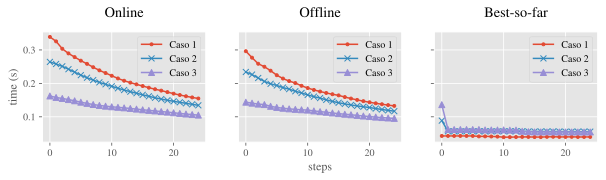

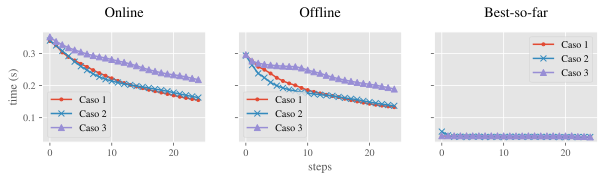

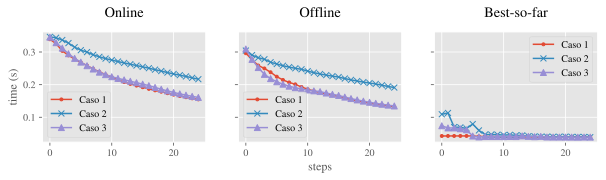

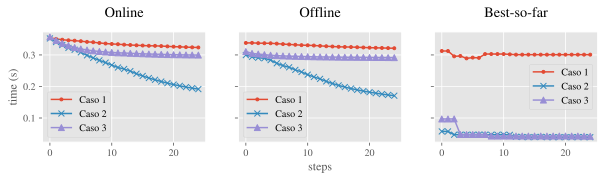

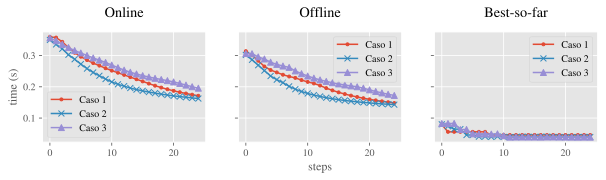

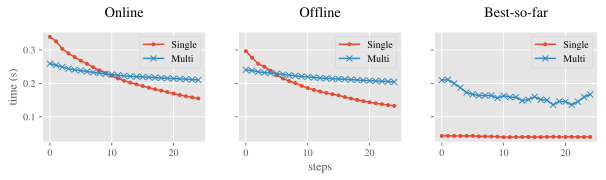

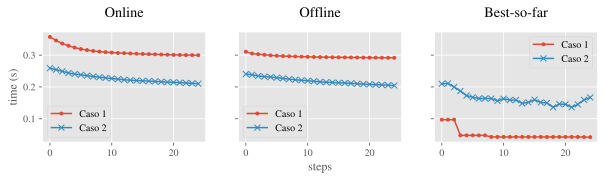

In [13]:
plot_experiment("1", save=True)
plot_experiment("2a", save=True)
plot_experiment("2b", save=True)
plot_experiment("3", save=True)
plot_experiment("4", save=True)
plot_experiment("5a", save=True)
plot_experiment("5b", save=True)

In [8]:
result = "| pid | deme | gen | time | space | score | index_query | elite | |:---------|:---------|:--------------------------------------------------------------------|--------:|---------:|--------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------| | 0123c75e | NATION | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```true``` | | ace5e784 | NATION | ```█····························································``` | 47.8378 | 4096 | 0.2392 | ```CREATE INDEX IF NOT EXISTS NATION__N_NATIONKEY ON NATION(N_NATIONKEY);``` | ```true``` | | d4b8ea42 | NATION | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | 076435ff | NATION | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | 88d4be27 | REGION | ```····█························································``` | 49.3713 | 4096 | 0.2469 | ```CREATE INDEX IF NOT EXISTS REGION__R_REGIONKEY ON REGION(R_REGIONKEY);``` | ```true``` | | 658f670a | REGION | ```····█························································``` | 49.3713 | 4096 | 0.2469 | ```CREATE INDEX IF NOT EXISTS REGION__R_REGIONKEY ON REGION(R_REGIONKEY);``` | ```false``` | | 884faf36 | REGION | ```·····█·······················································``` | 51.3332 | 4096 | 0.2567 | ```CREATE INDEX IF NOT EXISTS REGION__R_NAME ON REGION(R_NAME);``` | ```false``` | | 943580d8 | PART | ```············██···············································``` | 48.1663 | 356352 | 0.2426 | ```CREATE INDEX IF NOT EXISTS PART__P_SIZE__P_CONTAINER ON PART(P_SIZE, P_CONTAINER);``` | ```false``` | | 36b654f8 | PART | ```············██·█·············································``` | 46.2456 | 655360 | 0.2345 | ```CREATE INDEX IF NOT EXISTS PART__P_SIZE__P_CONTAINER__P_COMMENT ON PART(P_SIZE, P_CONTAINER, P_COMMENT);``` | ```true``` | | 7897cbce | PART | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```true``` | | 6986ce01 | PART | ```············█················································``` | 48.3328 | 184320 | 0.2426 | ```CREATE INDEX IF NOT EXISTS PART__P_SIZE ON PART(P_SIZE);``` | ```true``` | | 943307e1 | PART | ```·············█···············································``` | 46.4882 | 315392 | 0.234 | ```CREATE INDEX IF NOT EXISTS PART__P_CONTAINER ON PART(P_CONTAINER);``` | ```true``` | | 92ee5f51 | PART | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | 4b4f6420 | PART | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | c574d53c | PART | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | 2b9b797f | PART | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | 1f11ab9f | SUPPLIER | ```················█·····█······································``` | 47.3445 | 77824 | 0.2371 | ```CREATE INDEX IF NOT EXISTS SUPPLIER__S_SUPPKEY__S_COMMENT ON SUPPLIER(S_SUPPKEY, S_COMMENT);``` | ```true``` | | 7192a9f3 | SUPPLIER | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```true``` | | f00db5b5 | SUPPLIER | ```·····················█·······································``` | 56.2137 | 20480 | 0.2812 | ```CREATE INDEX IF NOT EXISTS SUPPLIER__S_ACCTBAL ON SUPPLIER(S_ACCTBAL);``` | ```false``` | | 7328e6f5 | SUPPLIER | ```················█············································``` | 48.1772 | 16384 | 0.241 | ```CREATE INDEX IF NOT EXISTS SUPPLIER__S_SUPPKEY ON SUPPLIER(S_SUPPKEY);``` | ```true``` | | 6682b4f9 | SUPPLIER | ```··················█··█·······································``` | 48.2858 | 49152 | 0.2417 | ```CREATE INDEX IF NOT EXISTS SUPPLIER__S_ADDRESS__S_ACCTBAL ON SUPPLIER(S_ADDRESS, S_ACCTBAL);``` | ```false``` | | 2c26e996 | SUPPLIER | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | 3b887259 | SUPPLIER | ```···················█·········································``` | 53.2887 | 16384 | 0.2665 | ```CREATE INDEX IF NOT EXISTS SUPPLIER__S_NATIONKEY ON SUPPLIER(S_NATIONKEY);``` | ```false``` | | 70ea5f6c | PARTSUPP | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```true``` | | a9c7656d | PARTSUPP | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | e3563042 | PARTSUPP | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | 0f718666 | PARTSUPP | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | 9a67556d | PARTSUPP | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```false``` | | 3033b6bb | CUSTOMER | ```·····························█·······························``` | 49.9382 | 393216 | 0.2517 | ```CREATE INDEX IF NOT EXISTS CUSTOMER__C_NAME ON CUSTOMER(C_NAME);``` | ```false``` | | 4f2c1b42 | CUSTOMER | ```·······························█·█···························``` | 50.3649 | 274432 | 0.2532 | ```CREATE INDEX IF NOT EXISTS CUSTOMER__C_NATIONKEY__C_ACCTBAL ON CUSTOMER(C_NATIONKEY, C_ACCTBAL);``` | ```false``` | | 233a7baa | CUSTOMER | ```·······························█···█·························``` | 47.5972 | 1277952 | 0.2444 | ```CREATE INDEX IF NOT EXISTS CUSTOMER__C_NATIONKEY__C_COMMENT ON CUSTOMER(C_NATIONKEY, C_COMMENT);``` | ```false``` | | 35fe65f1 | CUSTOMER | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```true``` | | ef58cff2 | CUSTOMER | ```·······························█·█···························``` | 50.3649 | 274432 | 0.2532 | ```CREATE INDEX IF NOT EXISTS CUSTOMER__C_NATIONKEY__C_ACCTBAL ON CUSTOMER(C_NATIONKEY, C_ACCTBAL);``` | ```false``` | | 343e416d | CUSTOMER | ```·······························█·····························``` | 47.6571 | 139264 | 0.239 | ```CREATE INDEX IF NOT EXISTS CUSTOMER__C_NATIONKEY ON CUSTOMER(C_NATIONKEY);``` | ```true``` | | 0e592ea7 | CUSTOMER | ```····························█································``` | 50.6815 | 155648 | 0.2542 | ```CREATE INDEX IF NOT EXISTS CUSTOMER__C_CUSTKEY ON CUSTOMER(C_CUSTKEY);``` | ```false``` | | d11802d4 | CUSTOMER | ```······························█······························``` | 46.9446 | 512000 | 0.2373 | ```CREATE INDEX IF NOT EXISTS CUSTOMER__C_ADDRESS ON CUSTOMER(C_ADDRESS);``` | ```true``` | | e8a7e328 | ORDERS | ```·········································█···················``` | 45.5271 | 2621440 | 0.2407 | ```CREATE INDEX IF NOT EXISTS ORDERS__O_ORDERPRIORITY ON ORDERS(O_ORDERPRIORITY);``` | ```true``` | | a07cafdf | ORDERS | ```·····································███·····················``` | 44.6869 | 3309568 | 0.24 | ```CREATE INDEX IF NOT EXISTS ORDERS__O_CUSTKEY__O_ORDERSTATUS__O_TOTALPRICE ON ORDERS(O_CUSTKEY, O_ORDERSTATUS, O_TOTALPRICE);``` | ```true``` | | 6c5fa126 | ORDERS | ```·······································█·····················``` | 49.1966 | 2555904 | 0.2588 | ```CREATE INDEX IF NOT EXISTS ORDERS__O_TOTALPRICE ON ORDERS(O_TOTALPRICE);``` | ```true``` | | 1c2c7403 | ORDERS | ```·····································███·····················``` | 45.0636 | 3309568 | 0.2419 | ```CREATE INDEX IF NOT EXISTS ORDERS__O_CUSTKEY__O_ORDERSTATUS__O_TOTALPRICE ON ORDERS(O_CUSTKEY, O_ORDERSTATUS, O_TOTALPRICE);``` | ```false``` | | c68cf120 | ORDERS | ```·······································█·····················``` | 49.1966 | 2555904 | 0.2588 | ```CREATE INDEX IF NOT EXISTS ORDERS__O_TOTALPRICE ON ORDERS(O_TOTALPRICE);``` | ```false``` | | bc091dcc | ORDERS | ```·····································█·█·█···················``` | 47.6775 | 4427776 | 0.2605 | ```CREATE INDEX IF NOT EXISTS ORDERS__O_CUSTKEY__O_TOTALPRICE__O_ORDERPRIORITY ON ORDERS(O_CUSTKEY, O_TOTALPRICE, O_ORDERPRIORITY);``` | ```false``` | | 47cc7474 | ORDERS | ```·······································█·····················``` | 49.1966 | 2555904 | 0.2588 | ```CREATE INDEX IF NOT EXISTS ORDERS__O_TOTALPRICE ON ORDERS(O_TOTALPRICE);``` | ```false``` | | 01b2a718 | ORDERS | ```·····································███·····················``` | 45.1377 | 3309568 | 0.2422 | ```CREATE INDEX IF NOT EXISTS ORDERS__O_CUSTKEY__O_ORDERSTATUS__O_TOTALPRICE ON ORDERS(O_CUSTKEY, O_ORDERSTATUS, O_TOTALPRICE);``` | ```false``` | | c909962c | ORDERS | ```·········································█···················``` | 45.5271 | 2621440 | 0.2407 | ```CREATE INDEX IF NOT EXISTS ORDERS__O_ORDERPRIORITY ON ORDERS(O_ORDERPRIORITY);``` | ```false``` | | 4f3e649c | LINEITEM | ```··············································█··█·····█····█``` | 2.7508 | 31186944 | 0.1697 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_PARTKEY__L_QUANTITY__L_SHIPDATE__L_COMMENT ON LINEITEM(L_PARTKEY, L_QUANTITY, L_SHIPDATE, L_COMMENT);``` | ```true``` | | 187634d8 | LINEITEM | ```····················································███···█·█``` | 45.5777 | 36765696 | 0.4117 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_TAX__L_RETURNFLAG__L_LINESTATUS__L_SHIPINSTRUCT__L_COMMENT ON LINEITEM(L_TAX, L_RETURNFLAG, L_LINESTATUS, L_SHIPINSTRUCT, L_COMMENT);``` | ```false``` | | a08e652e | LINEITEM | ```··············································█··█·█···█····█``` | 2.7426 | 36245504 | 0.1949 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_PARTKEY__L_QUANTITY__L_DISCOUNT__L_SHIPDATE__L_COMMENT ON LINEITEM(L_PARTKEY, L_QUANTITY, L_DISCOUNT, L_SHIPDATE, L_COMMENT);``` | ```true``` | | c5fdcf12 | LINEITEM | ```················································█··█·█·····█·``` | 45.446 | 15261696 | 0.3035 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_LINENUMBER__L_DISCOUNT__L_RETURNFLAG__L_SHIPMODE ON LINEITEM(L_LINENUMBER, L_DISCOUNT, L_RETURNFLAG, L_SHIPMODE);``` | ```false``` | | c5b0ee1a | LINEITEM | ```····················································███······``` | 45.2605 | 12128256 | 0.2869 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_TAX__L_RETURNFLAG__L_LINESTATUS ON LINEITEM(L_TAX, L_RETURNFLAG, L_LINESTATUS);``` | ```true``` | | bdd9fd2b | LINEITEM | ```·····························································``` | 50.4522 | 0 | 0.2523 | | ```true``` | | 14e40a3e | LINEITEM | ```·············································█···█··██··█····``` | 45.2736 | 21164032 | 0.3322 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_ORDERKEY__L_QUANTITY__L_TAX__L_RETURNFLAG__L_COMMITDATE ON LINEITEM(L_ORDERKEY, L_QUANTITY, L_TAX, L_RETURNFLAG, L_COMMITDATE);``` | ```false``` | | c605b57b | LINEITEM | ```····················································█···█····``` | 46.4973 | 16338944 | 0.3142 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_TAX__L_COMMITDATE ON LINEITEM(L_TAX, L_COMMITDATE);``` | ```false``` | | d3e086ea | LINEITEM | ```·············································█···█··██··█····``` | 45.1153 | 21164032 | 0.3314 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_ORDERKEY__L_QUANTITY__L_TAX__L_RETURNFLAG__L_COMMITDATE ON LINEITEM(L_ORDERKEY, L_QUANTITY, L_TAX, L_RETURNFLAG, L_COMMITDATE);``` | ```false``` | | cf75dac9 | LINEITEM | ```················································█··█·█·······``` | 45.3579 | 12075008 | 0.2872 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_LINENUMBER__L_DISCOUNT__L_RETURNFLAG ON LINEITEM(L_LINENUMBER, L_DISCOUNT, L_RETURNFLAG);``` | ```true``` | | c6c9de48 | LINEITEM | ```··············································█···█··█···█··█``` | 2.758 | 36548608 | 0.1965 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_PARTKEY__L_EXTENDEDPRICE__L_RETURNFLAG__L_RECEIPTDATE__L_COMMENT ON LINEITEM(L_PARTKEY, L_EXTENDEDPRICE, L_RETURNFLAG, L_RECEIPTDATE, L_COMMENT);``` | ```false``` | | 942d178a | LINEITEM | ```·············································█···█··██··█···█``` | 45.881 | 37945344 | 0.4191 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_ORDERKEY__L_QUANTITY__L_TAX__L_RETURNFLAG__L_COMMITDATE__L_COMMENT ON LINEITEM(L_ORDERKEY, L_QUANTITY, L_TAX, L_RETURNFLAG, L_COMMITDATE, L_COMMENT);``` | ```false``` | | fb0fb4a5 | LINEITEM | ```················································█······██····``` | 45.2999 | 19169280 | 0.3223 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_LINENUMBER__L_SHIPDATE__L_COMMITDATE ON LINEITEM(L_LINENUMBER, L_SHIPDATE, L_COMMITDATE);``` | ```false``` | | c80595a3 | LINEITEM | ```················································█··█·█·······``` | 45.8883 | 12075008 | 0.2898 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_LINENUMBER__L_DISCOUNT__L_RETURNFLAG ON LINEITEM(L_LINENUMBER, L_DISCOUNT, L_RETURNFLAG);``` | ```false``` | | c90675bb | LINEITEM | ```····················································███······``` | 45.9687 | 12128256 | 0.2905 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_TAX__L_RETURNFLAG__L_LINESTATUS ON LINEITEM(L_TAX, L_RETURNFLAG, L_LINESTATUS);``` | ```false``` | | f8a52648 | LINEITEM | ```··············································█···········█··``` | 2.9376 | 14467072 | 0.087 | ```CREATE INDEX IF NOT EXISTS LINEITEM__L_PARTKEY__L_SHIPINSTRUCT ON LINEITEM(L_PARTKEY, L_SHIPINSTRUCT);``` | ```true``` |"

In [17]:
pd.read_csv(
    StringIO(result.replace(' ', '')),  # Get rid of whitespaces
    sep='|',
    index_col=1
)

,Unnamed: 0,deme,gen,time,space,score,index_query,elite,Unnamed: 9,:---------,...,Unnamed: 558,f8a52648,LINEITEM.15,```··············································█···········█··```,2.9376,14467072,0.087,"```CREATEINDEXIFNOTEXISTSLINEITEM__L_PARTKEY__L_SHIPINSTRUCTONLINEITEM(L_PARTKEY,L_SHIPINSTRUCT);```",```true```.22,Unnamed: 567
pid,,,,,,,,,,,,,,,,,,,,,
